<h1>Soal 1: Pemahaman</h1>

1. Sebutkan apa saja yang termasuk preprocessing data!
2. Jelaskan beberapa cara imputing missing value!
3. Kapan kita perlu melakukan feature centering dan scaling?
4. Bagaimana Data Science Workflow?

Jawab:

1. Binarization, Mean Removal, Scaling, Normalization dan Label encoding.
2. Hot deck imputation, dimana dari unit-unit yang tercatat disubstitusikan terhadap missing data. Cold deck imputation, dimana missing value diganti oleh suatu nilai yang konstan. Mean imputation, yaitu dimana nilai yang hilang diganti oleh rata-rata (mean) dari kelompok sampel unit terkait. Regression (correlation) imputation, yaitu dimana missing value dari suatu variabel diestimasi menggunakan nilai penduga dari regresi atau korelasi variabel tersebut pada variabel lainnya yang diketahui.
3. Ketika rentang variabel data yang akan dilatih berbeda jauh. Karena sebagian besar model berdasarkan pada perhitungan Euclidean Distance bila perbedaan skalanya jauh akan menghasilkan distance yang besar juga.
4. Secara garis besar terdapat tiga tahapan. Pertama preparasi, seperti pengumpulan data dan data tersebut 'dibersihkan' terlebih dahulu. Kedua eksperimen, disini hipotesa dibuat, data divisualisasikan dan model dijalankan hingga dievaluasi. Ketiga distribusi antara lain reporting dan deploying.

---

<h1>Soal 2: Pengaplikasian</h1>

Selamat, sampai tahap ini kalian telah belajar banyak tentang data science, dari mulai python, data manipulasi, visualisasi, dan pembuatan model. Sekarang saatnya untuk mengaplikasikan semuanya.

Download dan gunakan data [titanic.csv](https://drive.google.com/uc?export=download&id=15-XQkmqj2UlFQH7rASJH1oxWST6o9mbm) sebagai data untuk pembuatan model ML. Pahami betul data ini dengan melakukan EDA (Explolatory Data Analaysis), Visualisasi, Data Analysis, Preprocessing Data, dan Modeling.

<b>(Optional)</b> Download dan gunakan data [titanic_test.csv](https://drive.google.com/uc?export=download&id=15-XQkmqj2UlFQH7rASJH1oxWST6o9mbm) untuk mengetest model kalian dengan melakukan prediksi terhadap data tersebut. Submit hasil prediksinya ke kaggle dan lihat scorenya. https://www.kaggle.com/c/titanic/submit

![alt text](https://drive.google.com/uc?id=1SyflO2YeuCdYhxwPF6CAtMeaNN1qTaFx)

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_dir = pd.read_csv('titanic.csv')
test_dir = pd.read_csv('titanic_test.csv')
print("Training data: {}".format(train_dir.shape))
print("Testing data: {}".format(test_dir.shape))

Training data: (891, 12)
Testing data: (418, 11)


In [3]:
train_dir.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Delete Unwanted Columns

updated_train_dir = train_dir.drop(['Ticket', 'PassengerId', 'Name','Cabin'], axis = 1)
updated_train_dir.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


In [21]:
updated_test_dir = test_dir.drop(['Ticket', 'PassengerId', 'Name','Cabin'], axis = 1)
updated_test_dir.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q


In [22]:
# Fixing the Null Values

updated_train_dir.isnull().any()

Survived    False
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool

In [23]:
updated_train_dir['Age'].fillna(updated_train_dir['Age'].median(), inplace=True)
updated_train_dir['Embarked'].fillna('S', inplace=True)
updated_train_dir.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

In [24]:
updated_test_dir['Age'].fillna(updated_train_dir['Age'].median(), inplace=True)
updated_test_dir['Embarked'].fillna('S', inplace=True)
updated_test_dir.isnull().any()

Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare         True
Embarked    False
dtype: bool

In [25]:
# Explorary Data Analysis

# Survival Value
total_survived_notsurvived = updated_train_dir['Survived'].shape[0]
num_survived = updated_train_dir[updated_train_dir['Survived'] == 1].shape[0]
not_survived = updated_train_dir[updated_train_dir['Survived'] == 0].shape[0]

print("Survived: {}".format(100 * (num_survived / total_survived_notsurvived)))
print("Not Survived: {}".format(100 * (not_survived/total_survived_notsurvived)))

Survived: 38.38383838383838
Not Survived: 61.61616161616161


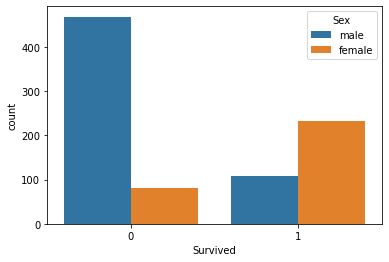

In [26]:
# Gender
sns.countplot(x='Survived', hue='Sex', data=updated_train_dir)

In [27]:
#Group Age

def grouping_Age(x):
    if x in range(0, 21):    # 0 - 20 years old
        return 1
    elif x in range(21, 41): # 21 - 40 years old
        return 2
    else:                    # > 40 years old
        return 3
    
    
updated_train_dir['Age group']= updated_train_dir['Age'].apply(grouping_Age)
updated_test_dir['Age group']= updated_test_dir['Age'].apply(grouping_Age)

updated_train_dir['Age group'].value_counts()

2    551
1    171
3    169
Name: Age group, dtype: int64

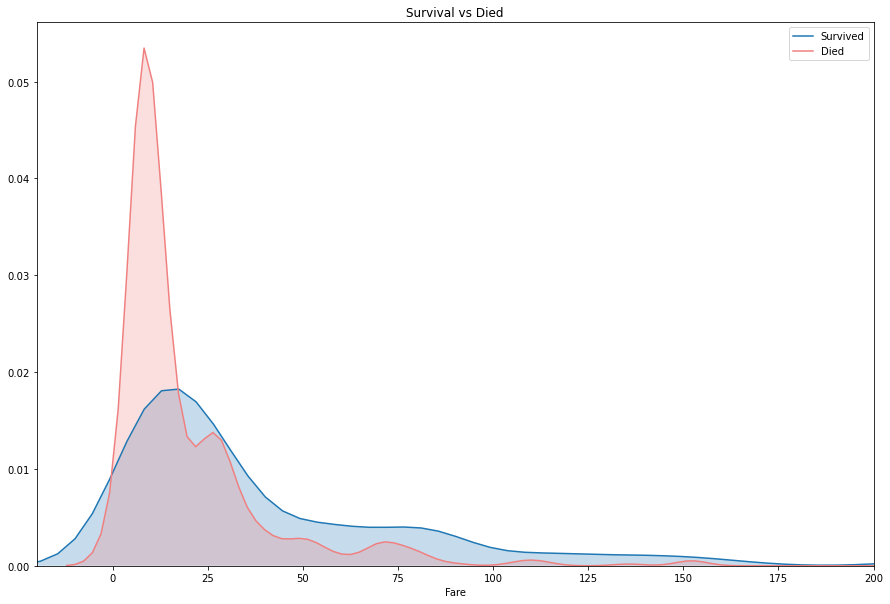

In [28]:
#Fare Value

plt.figure(figsize=(15,10))

figure = sns.kdeplot(updated_train_dir['Fare'][updated_train_dir.Survived == 1],
                    shade=True)
sns.kdeplot(updated_train_dir['Fare'][updated_train_dir.Survived == 0],
                 color="lightcoral",   shade=True)
plt.legend(['Survived', 'Died'])
plt.title("Survival vs Died")
plt.xlim(-20,200)

figure.set(xlabel='Fare')
plt.show()

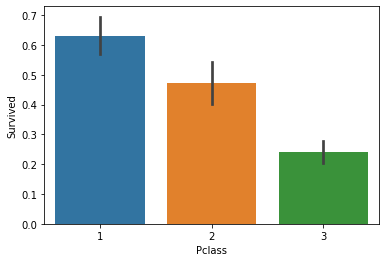

In [29]:
# Ticket Class

sns.barplot('Pclass', 'Survived', data=updated_train_dir)
plt.show()

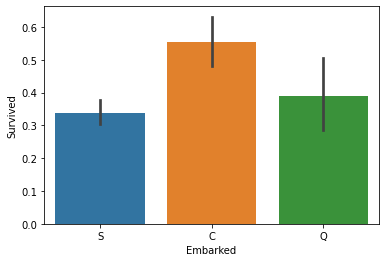

In [30]:
# Embarked

sns.barplot('Embarked','Survived', data=updated_train_dir)
plt.show()

So, below are the observations till now

- People onboarded from C(Cherbourg) survived more
- Female survived more as compared to Male
- More Fares = Higher Ticket class = More survival chances

In [6]:
updated_train_dir.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


In [7]:
updated_train_dir['Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [32]:
updated_test_dir.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age group
0,3,male,34.5,0,0,7.8292,Q,3
1,3,female,47.0,1,0,7.0000,S,3


In [33]:
# Preparing Data

gender = {
    'male': 1,
    'female':0
}
updated_train_dir['Sex'] = updated_train_dir['Sex'].apply(lambda x: gender.get(x))
updated_test_dir['Sex'] = updated_test_dir['Sex'].apply(lambda x: gender.get(x))

updated_train_dir.drop(['Age'], axis=1, inplace=True)
updated_test_dir.drop(['Age'], axis=1, inplace=True)

updated_train_dir.drop(['Fare'], axis=1, inplace=True)
updated_test_dir.drop(['Fare'], axis=1, inplace=True)

updated_train_dir.head(3)

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age group
0,0,3,1,1,0,S,2
1,1,1,0,1,0,C,2
2,1,3,0,0,0,S,2


In [34]:
traindf = pd.get_dummies(updated_train_dir, columns = ["Embarked","Age group", "Pclass"],
                             prefix=["Em_type", "Age_group", "Pclass_"])
testdf = pd.get_dummies(updated_test_dir, columns = ["Embarked","Age group", "Pclass"],
                             prefix=["Em_type", "Age_group", "Pclass_"])
testdf.head()

,Sex,SibSp,Parch,Em_type_C,Em_type_Q,Em_type_S,Age_group_1,Age_group_2,Age_group_3,Pclass__1,Pclass__2,Pclass__3
0,1,0,0,0,1,0,0,0,1,0,0,1
1,0,1,0,0,0,1,0,0,1,0,0,1
2,1,0,0,0,1,0,0,0,1,0,1,0
3,1,0,0,0,0,1,0,1,0,0,0,1
4,0,1,1,0,0,1,0,1,0,0,0,1


In [35]:
traindf.head()

,Survived,Sex,SibSp,Parch,Em_type_C,Em_type_Q,Em_type_S,Age_group_1,Age_group_2,Age_group_3,Pclass__1,Pclass__2,Pclass__3
0,0,1,1,0,0,0,1,0,1,0,0,0,1
1,1,0,1,0,1,0,0,0,1,0,1,0,0
2,1,0,0,0,0,0,1,0,1,0,0,0,1
3,1,0,1,0,0,0,1,0,1,0,1,0,0
4,0,1,0,0,0,0,1,0,1,0,0,0,1


In [36]:
# Define features value
train_y = traindf['Survived']
traindf.drop(['Survived'], axis=1,inplace=True)

In [38]:
# Split data
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(traindf,
                                                   train_y,
                                                test_size=0.3,
                                                   random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((623, 12), (268, 12), (623,), (268,))

In [39]:
# Training Data
from sklearn.svm import SVC, LinearSVC

svc_model = SVC()

svc_model.fit(X_train, Y_train)
predictions_svc = svc_model.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score

SVC_acc = accuracy_score(predictions_svc, Y_test) * 100
print("SVC accuracy: {}".format(SVC_acc))

SVC accuracy: 80.59701492537313


In [42]:
pred_test = svc_model.predict(testdf)
pred_test

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [45]:
submission = pd.DataFrame({
        "PassengerId": test_dir["PassengerId"],
        "Survived": pred_test})

submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [46]:
submission.to_csv("submission.csv",index=False)